Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -

1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
````
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type
````

In [3]:
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

In [13]:
df = pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv')

In [14]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


### ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [15]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [16]:
df[['Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',]]

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
1,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible
2,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
3,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
4,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible
...,...,...,...,...
130438,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130439,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130440,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...
130441,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible


In [18]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [21]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range'][['Make', 'Model', 'Electric Vehicle Type']]

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
130377,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130385,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV)
130390,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
130407,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


These are all the cars and their types that do not qualify for clean alternative fuel vehicle

### ● Get all TESLA cars with the model year, and model type made in Bothell City.

In [30]:
df1 = df.copy()

In [24]:
df1.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [36]:
df1[(df1.Make == 'TESLA') & (df1.City == 'Bothell')][['Make','Model Year','Model','City']]

,Make,Model Year,Model,City
39,TESLA,2020,MODEL 3,Bothell
217,TESLA,2022,MODEL 3,Bothell
218,TESLA,2022,MODEL Y,Bothell
222,TESLA,2018,MODEL 3,Bothell
292,TESLA,2017,MODEL X,Bothell
...,...,...,...,...
129778,TESLA,2019,MODEL 3,Bothell
129954,TESLA,2021,MODEL 3,Bothell
129976,TESLA,2014,MODEL S,Bothell
130295,TESLA,2022,MODEL 3,Bothell


These are all TESLA cars with the model year, and model type made in Bothell City.

### ● Get all the cars that have an electric range of more than 100, and were made after 2015

In [37]:
df1[(df1['Electric Range']>100) & (df1['Model Year']>2015)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


These are all the cars that have an electric range of more than 100, and were made after 2015.

### ● Draw plots to show the distribution between city and electric vehicle type

In [39]:
df2 = df1[['City','Electric Vehicle Type']]
df2

,City,Electric Vehicle Type
0,Yakima,Battery Electric Vehicle (BEV)
1,Poulsbo,Plug-in Hybrid Electric Vehicle (PHEV)
2,Seattle,Battery Electric Vehicle (BEV)
3,Seattle,Battery Electric Vehicle (BEV)
4,Lacey,Battery Electric Vehicle (BEV)
...,...,...
130438,Gig Harbor,Battery Electric Vehicle (BEV)
130439,Tacoma,Battery Electric Vehicle (BEV)
130440,Seattle,Battery Electric Vehicle (BEV)
130441,Camano Island,Battery Electric Vehicle (BEV)


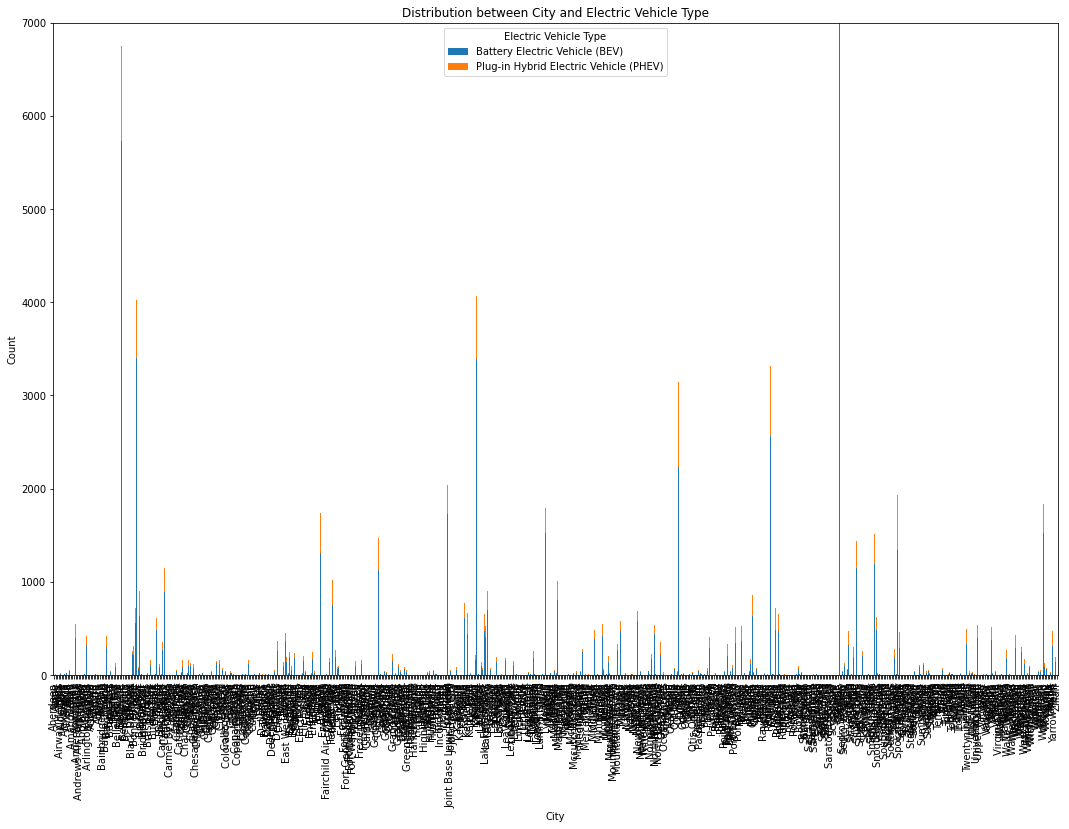

In [65]:
# Calculate the counts for each combination of categories
counts = df2.groupby(['City','Electric Vehicle Type']).size().unstack()

# Plot the stacked bar plot
counts.plot(kind='bar', stacked=True, figsize=(18, 12))
plt.ylim(0,7000)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution between City and Electric Vehicle Type')

# Display the plot
plt.show()